# Lab 2 - Classification

## 1. Introduction


In this lab, we explore **supervised learning** with a focus on **classification problems**, where the task is to predict discrete class labels based on input features. We will implement and analyze several widely used **classification models** including Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machine (SVM), and Naive Bayes. Each model will be trained on labeled data and evaluated using key **performance metrics** such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, and AUC score. Furthermore, we will apply **hyperparameter tuning** techniques to optimize the performance of our models, using methods like grid search and cross-validation. Through this lab, you will develop a deeper understanding of building classification models, interpreting their results, evaluating their effectiveness, and improving them through careful tuning and validation.


### What is Supervised Learning?

**Supervised learning** is a type of machine learning where a model is trained on a labeled dataset, meaning that for each input, the correct output is already known. The goal is for the model to learn the relationship between inputs and outputs, so it can predict the correct output for new, unseen data. 

For example, in a spam detection system, the model is trained using thousands of emails that are already labeled as "spam" or "not spam." By learning from the patterns in these labeled examples — like specific words or email structures — the model becomes able to classify new incoming emails as either spam or not spam without needing human input. 

In supervised learning, the model improves by minimizing the error between its predictions and the actual labels during training.

Extra Sources: [Google Cloud](https://cloud.google.com/discover/what-is-supervised-learning#:~:text=Supervised%20learning%20is%20a%20category,the%20input%20and%20the%20outputs.), [IBM](https://www.ibm.com/think/topics/supervised-learning)






### What is a Classification Problem in Machine Learning?

**Classification** is a type of supervised learning problem in machine learning where the goal is to assign an input to one of several predefined categories or classes.  
The model learns from a labeled dataset, where each input is already associated with the correct class, and aims to predict the correct class for new, unseen inputs.  
Classification is used when the output is **discrete** — meaning it belongs to a set of distinct groups.

### Example
- Given a photo of an animal, classify it as a **cat**, **dog**, or **rabbit**.
- Given an email, classify it as **spam** or **not spam**.

---

In simple terms, classification answers the question:

> "Which category does this input belong to?"


### Example Problem Flow

### Problem
We want to classify a flower into one of three species:
- **Setosa**
- **Versicolor**
- **Virginica**

based on its measurements.

### How it Works
- We collect a **structured dataset** with flower features and their known species.

Example structured dataset:

| Sepal Length (cm) | Sepal Width (cm) | Petal Length (cm) | Petal Width (cm) | Species      |
|-------------------|------------------|-------------------|------------------|--------------|
| 5.1               | 3.5              | 1.4               | 0.2              | Setosa       |
| 7.0               | 3.2              | 4.7               | 1.4              | Versicolor   |
| 6.3               | 3.3              | 6.0               | 2.5              | Virginica    |
| 4.9               | 3.1              | 1.5               | 0.1              | Setosa       |
| ...               | ...              | ...               | ...              | ...          |

- **Input**: Sepal Length, Sepal Width, Petal Length, Petal Width  
- **Output**: Species (Setosa, Versicolor, Virginica)

### Training
- We train a classification model (e.g., Decision Tree, Support Vector Machine) on this structured dataset.
- The model learns how the flower's measurements are related to its species.

### After Training
- When given a **new flower's measurements**, the model can **predict** which species it belongs to, even if it has never seen that particular flower before.

---

> In simple words:  
> **We teach the model with examples of flower measurements and correct species, so it can guess the species of new flowers.**



## 2. Importing Data

In [73]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [12]:
#Uploading Data
path="D:/Workshop-ML/data/"
data=pd.read_csv(path+"data.csv")
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [39]:
#Making Train Test Split
X=data.drop(columns="Survived")
y=data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 3. Training Different Models

### Logistic Regression

**Logistic Regression** is a supervised learning algorithm used for **classification tasks**.  
Despite its name, it is actually a classification model rather than a regression model.

The main idea of logistic regression is to model the probability that a given input belongs to a particular class.  
It uses the **logistic (sigmoid) function** to map any real-valued number into a value between 0 and 1, representing probability.

The model predicts probabilities and then classifies inputs by applying a threshold (usually 0.5).  
- If the predicted probability is greater than 0.5, it classifies the input as **class 1**.
- Otherwise, it classifies the input as **class 0**.

### Mathematical Formulation

The logistic (sigmoid) function is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where 

$$
z = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n
$$

is a linear combination of the input features.

## When to Use Logistic Regression
- Binary classification (e.g., spam vs. not spam)


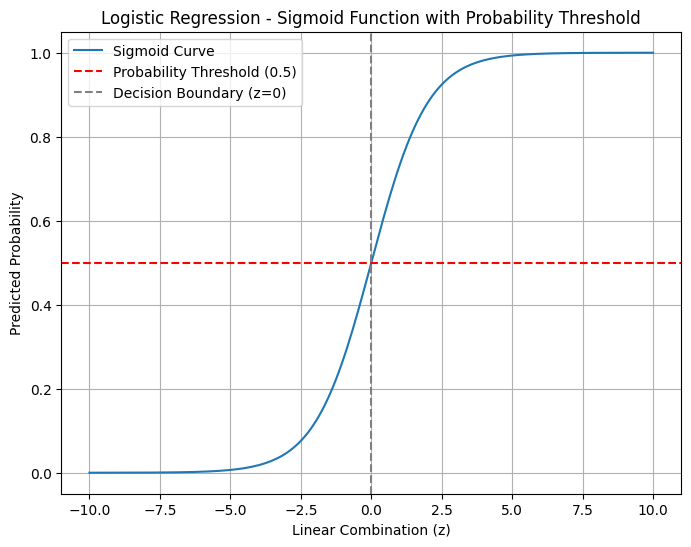

In [23]:
#Training Logistic Regression Model

model = LogisticRegression()
model.fit(X_train, y_train)



c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
#Getting Predictions from Model
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [31]:
#Getting Probabilities of each test data (if it is higher than 0.5 it is counted as Survived)
y_proba = model.predict_proba(X_test)
y_proba[:10]


array([[0.85044009, 0.14955991],
       [0.77438699, 0.22561301],
       [0.8687955 , 0.1312045 ],
       [0.11478014, 0.88521986],
       [0.26464451, 0.73535549],
       [0.06467267, 0.93532733],
       [0.31438423, 0.68561577],
       [0.91376844, 0.08623156],
       [0.25760641, 0.74239359],
       [0.07532136, 0.92467864]])

In [48]:
features=list(X_train.columns)

In [49]:
importance = model.coef_[0]


In [50]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})


### Feature Importance 

**Feature importance** refers to techniques that assign a score to each input feature based on how useful it is at predicting the target variable. The meaning of the importance score depends on the type of model: in tree-based models (like Decision Trees or Random Forests), importance scores are always positive, between 0 and 1, and represent how much a feature helps in reducing impurity (creating better splits); in linear models (like Logistic Regression or Linear Regression), the scores are the model’s coefficients, which can be positive or negative, indicating both the direction and strength of a feature’s influence on the prediction. A **positive coefficient** means the feature increases the likelihood of predicting a higher target value (e.g., class 1), while a **negative coefficient** means the feature pushes the prediction toward a lower target value (e.g., class 0). A larger absolute value — whether positive or negative — means the feature has a stronger impact. By analyzing feature importance, we can interpret the model’s behavior, identify the most influential features, simplify models by removing weak features, and gain insights into the relationships in the data.




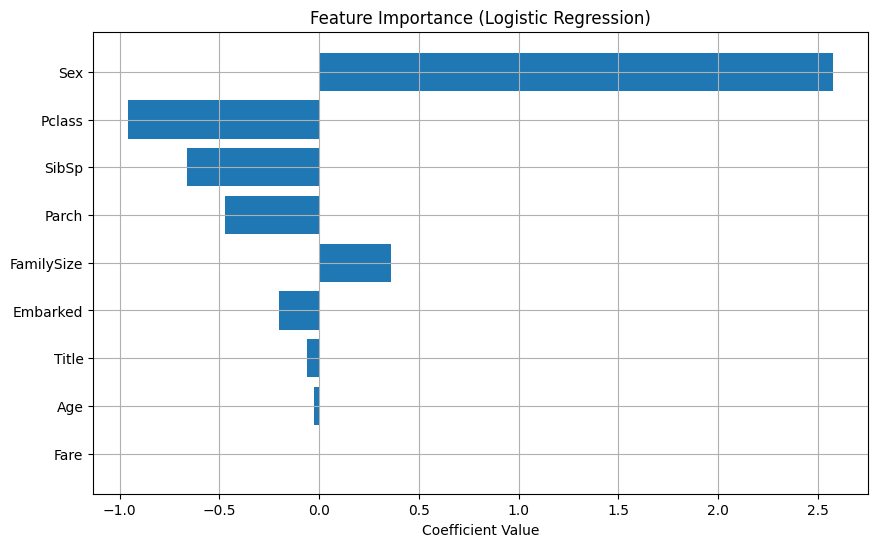

In [51]:
feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

# 6. Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


### KNN 

# K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is a simple, powerful, and intuitive supervised learning algorithm used for **classification** and **regression** tasks.  
In KNN, the idea is to classify a new data point based on the labels of its **'k' nearest neighbors** in the training data.

Unlike many other algorithms, KNN **does not build an explicit model** during training. Instead, it memorizes the training dataset and makes decisions **only at prediction time**, which is why KNN is sometimes called a **lazy learning algorithm**.



## How KNN Works (for Classification)

1. **Choose the number of neighbors** \( k \) (e.g., \( k = 3 \)).
2. **Compute the distance** between the new point and all training data points.
   - Common distance metrics: **Euclidean distance**, **Manhattan distance**.
3. **Select the k closest points** (neighbors) based on the calculated distances.
4. **Assign the most common class label** among the \( k \) neighbors to the new point.



## Key Points:
- **Small \( k \)** (e.g., 1 or 3) can make the model sensitive to noise (overfitting).
- **Large \( k \)** smoothens the decision boundaries but can cause underfitting.
- KNN assumes that **similar points are close** in feature space.
- KNN can work with multiple classes (multiclass classification).



## Example Visualization

In the figure below:
- **Blue points** belong to **Class 0**.
- **Red points** belong to **Class 1**.
- A **green X** represents a **new data point** we want to classify.

To classify the green point:
- We compute its distance to all training points.
- Find the \( k \) closest ones (for example, 3 nearest neighbors).
- The most frequent class among these neighbors is assigned to the green point.

The visual intuition shows that KNN is a **proximity-based method**:  
closer points influence the prediction more strongly.




> **In simple words:**  
> KNN looks at the closest neighbors and "votes" to decide the class of a new point!


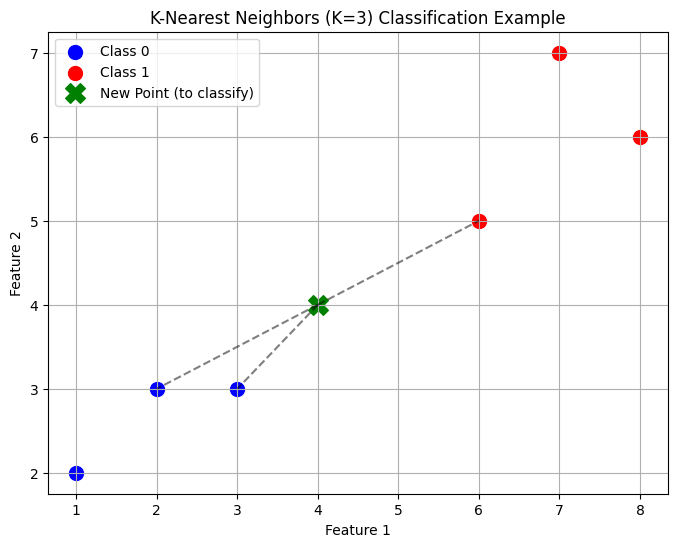

In [54]:
#Training KNN Model

knn = KNeighborsClassifier(n_neighbors=5)  # We will use 5 neighbors
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_test) # Prediction of the models
y_pred[:10]


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

### Decision Trees

# Decision Trees

**Decision Trees** are supervised learning models used for both **classification** and **regression** tasks.  
They work by splitting the data into subsets based on feature values, following a structure that looks like a flowchart: each internal node tests a feature, each branch represents a decision outcome, and each leaf node assigns a prediction.

At each node, the algorithm chooses the feature and threshold that best splits the data according to some criterion (like **Gini impurity** or **Information Gain**).

---

## Key Points:
- Easy to interpret and visualize.
- Can handle both numerical and categorical data.
- Prone to **overfitting** if not properly controlled (e.g., limiting the depth).

---

## Example Visualization

The figure below shows a decision tree trained on the **Iris dataset**:
- Internal nodes show decisions based on flower measurements (like petal length).
- Leaves represent final predicted classes (e.g., Setosa, Versicolor, Virginica).

<img src="output.png" width="800">


---

> **In simple words:**  
> A Decision Tree splits the dataset into smaller and smaller groups based on feature values, until it can make a decision (prediction) at the leaf.


In [64]:
#Train the Decision Tree Classifier
model = DecisionTreeClassifier(
    criterion='gini',     # or use 'entropy' for Information Gain
    max_depth=3,          # limit tree depth to avoid overfitting, it limits depth of the tree
    random_state=42
)

# 4. Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [65]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

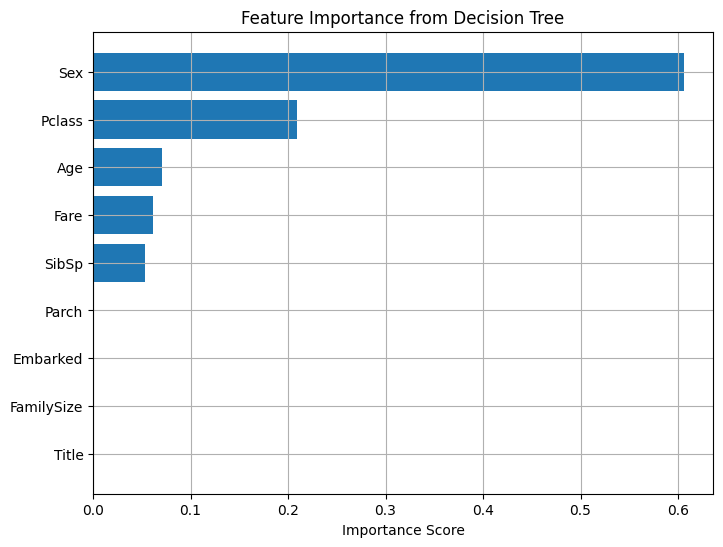

In [66]:
importances = model.feature_importances_

# 4. Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 5. Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

### Random Forests


**Random Forest** is an ensemble machine learning method that combines the outputs of many individual decision trees to create a stronger and more robust model. It works by training each tree on a random subset of the data (using bootstrap sampling) and selecting a random subset of features at each split, which helps to reduce overfitting and make the trees less correlated with each other. **It is called "Random" Forest because both the training data and the features are randomly sampled when building each tree**, introducing diversity among the trees and improving the overall generalization performance. In classification tasks, Random Forest predicts by majority voting across the trees, while in regression tasks it predicts by averaging the outputs. The use of randomness and multiple trees helps Random Forest achieve better accuracy, lower variance, and greater resistance to noisy data compared to a single decision tree. Random Forests can also measure feature importance, providing insights into which variables are most influential for the model’s predictions. Although the ensemble is less interpretable than a single tree, Random Forest is a powerful and reliable method widely used in practice.



<img src="1_hmtbIgxoflflJqMJ_UHwXw.jpg" width=700>


In [69]:
#Train the Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,    # number of trees in the forest
    max_depth=None,      # trees will expand until all leaves are pure or until all leaves contain less than min_samples_split samples
    random_state=42
)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

### Support Vector Machines (SVM)

**Support Vector Machines (SVM)** are powerful supervised learning algorithms used for both **classification** and **regression** tasks. In classification, the main goal of SVM is to find the **optimal hyperplane** that best separates the data into different classes. The hyperplane is chosen to maximize the **margin**, which is the distance between the hyperplane and the nearest data points from each class (called **support vectors**). A larger margin generally leads to better generalization to unseen data. SVMs can perform both linear and non-linear classification: by using a technique called the **kernel trick**, SVMs can implicitly map data into higher-dimensional spaces where a linear separator is possible even if the original data is not linearly separable. Popular kernels include linear, polynomial, and radial basis function (RBF). SVMs are particularly effective in high-dimensional spaces and are robust against overfitting, especially when the number of dimensions exceeds the number of samples.

<img src="svm.png" width=600>

---

> **In simple words:**  
> SVM tries to find the "widest possible street" between two classes, using only the edge cases (support vectors) to define it.


In [71]:
# 3. Initialize the SVM classifier
model = SVC(
    kernel='linear',    # Kernel type: 'linear', 'poly', 'rbf', or 'sigmoid'
    C=1.0,              # Regularization parameter (larger C = less regularization)
    random_state=42
)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

**Regularization** in SVM (and machine learning in general) helps control model complexity by adding a penalty for being too complex, making the model more general and less prone to overfitting.



### Naive Bayes

**Naive Bayes** is a family of simple and powerful supervised learning algorithms based on applying **Bayes' Theorem** with a strong assumption that features are **independent** given the class label (this is the "naive" part). Despite this strong and often unrealistic assumption, Naive Bayes classifiers perform surprisingly well in many practical applications, especially when working with high-dimensional data like text classification problems.

Bayes' Theorem describes the probability of a class given the observed features:

$$
P(\text{Class} \mid \text{Features}) = \frac{P(\text{Features} \mid \text{Class}) \times P(\text{Class})}{P(\text{Features})}
$$

In Naive Bayes, because features are assumed to be independent, the joint probability is computed as:

$$
P(\text{Features} \mid \text{Class}) = P(\text{Feature}_1 \mid \text{Class}) \times P(\text{Feature}_2 \mid \text{Class}) \times \cdots \times P(\text{Feature}_n \mid \text{Class})
$$

The model predicts the class with the highest posterior probability.

There are different types of Naive Bayes classifiers based on the nature of the feature distributions, such as:
- **Gaussian Naive Bayes**: assumes features follow a normal (Gaussian) distribution.
- **Multinomial Naive Bayes**: used for discrete counts (e.g., text data - word counts).
- **Bernoulli Naive Bayes**: used for binary/boolean features.

---

> **In simple words:**  
> Naive Bayes uses probability rules to guess the most likely class, assuming each feature contributes independently to the result.


In [75]:
model = GaussianNB()
# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)